# Mini Project Presentation by Madhu

## Weather Comparision
### For selected four cities Auckland, Wellington from North Island and 
### Chirstchurch and Queenstown from South Island

#### DATA is acquired from Open Weather website using their APIs


### Problem Statement
#### what are the weather conditions like in the selected cities and compare them

In [403]:
import requests
import json
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline


In [295]:
#To find out longitude and latitudes for the selceted cities using API

In [296]:
courty_code_url = "http://api.openweathermap.org/geo/1.0/direct?q=Queenstown,NZL&appid=4fdf8ac5be828611d65b4b0644622719"

In [297]:
country_res = requests.get(courty_code_url)

In [298]:
country_res.json()[0]["lat"], country_res.json()[0]["lon"]

(-45.0321923, 168.661)

## Connecting to API and requesting data in JSOn format:
Data Wellington

In [413]:

url = "https://history.openweathermap.org/data/2.5/history/city?lat=-41.2924&lon=174.7787&type=hour&start=1661270364&end=1669253220&appid=4fdf8ac5be828611d65b4b0644622719"

In [414]:
response = requests.get(url)

In [415]:
result = response.json()
result

{'message': 'Count: 168',
 'cod': '200',
 'city_id': 1,
 'calctime': 0.072572789,
 'cnt': 168,
 'list': [{'dt': 1661270400,
   'main': {'temp': 284.63,
    'feels_like': 283.95,
    'pressure': 1011,
    'humidity': 81,
    'temp_min': 283.66,
    'temp_max': 285.41},
   'wind': {'speed': 12.35, 'deg': 10},
   'clouds': {'all': 100},
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04n'}]},
  {'dt': 1661274000,
   'main': {'temp': 284.07,
    'feels_like': 283.31,
    'pressure': 1010,
    'humidity': 80,
    'temp_min': 283.46,
    'temp_max': 284.96},
   'wind': {'speed': 11.83, 'deg': 10},
   'clouds': {'all': 100},
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04n'}]},
  {'dt': 1661277600,
   'main': {'temp': 284.39,
    'feels_like': 283.61,
    'pressure': 1011,
    'humidity': 78,
    'temp_min': 283.66,
    'temp_max': 284.96},
   'wind': {'speed': 12.35, 'deg': 10, 'g

In [416]:
result["list"]

[{'dt': 1661270400,
  'main': {'temp': 284.63,
   'feels_like': 283.95,
   'pressure': 1011,
   'humidity': 81,
   'temp_min': 283.66,
   'temp_max': 285.41},
  'wind': {'speed': 12.35, 'deg': 10},
  'clouds': {'all': 100},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}]},
 {'dt': 1661274000,
  'main': {'temp': 284.07,
   'feels_like': 283.31,
   'pressure': 1010,
   'humidity': 80,
   'temp_min': 283.46,
   'temp_max': 284.96},
  'wind': {'speed': 11.83, 'deg': 10},
  'clouds': {'all': 100},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}]},
 {'dt': 1661277600,
  'main': {'temp': 284.39,
   'feels_like': 283.61,
   'pressure': 1011,
   'humidity': 78,
   'temp_min': 283.66,
   'temp_max': 284.96},
  'wind': {'speed': 12.35, 'deg': 10, 'gust': 17.49},
  'clouds': {'all': 75},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '0

In [417]:
len(result["list"])

168

In [418]:
city = []
date = []
temp = []
feels_like = []
pressure = []
humidity = []
temp_min = []
temp_max = []
wind_speed = []
wind_deg = []
wind_gust = []
clouds = []
weather = []

for i in range(len(result["list"])):
    date.append(result["list"][i]["dt"])
    temp.append(result["list"][i]["main"]["temp"])
    feels_like.append(result["list"][i]["main"]["feels_like"])
    pressure.append(result["list"][i]["main"]["pressure"])
    humidity.append(result["list"][i]["main"]["humidity"])
    temp_min.append(result["list"][i]["main"]["temp_min"])
    temp_max.append(result["list"][i]["main"]["temp_max"])
    wind_speed.append(result["list"][i]["wind"]["speed"])
    wind_deg.append(result["list"][i]["wind"]["deg"])
    #wind_gust.append(result["list"][i]["wind"]['gust'])
    clouds.append(result["list"][i]["clouds"]["all"])
    weather.append(result["list"][i]["weather"][0]["main"])
    city.append("WG")

In [419]:
columns = ["city", "date", "temp", "feels_like", "pressure", "humidity", "temp_min", "temp_max", "wind_speed", "wind_deg", "clouds", "weather"]


In [420]:
wg_data = pd.DataFrame(list(zip(city,date, temp, feels_like, pressure, humidity, temp_min, temp_max, wind_speed, wind_deg, clouds, weather)), columns = columns)
wg_data

,city,date,temp,feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds,weather
0,WG,1661270400,284.63,283.95,1011,81,283.66,285.41,12.35,10,100,Clouds
1,WG,1661274000,284.07,283.31,1010,80,283.46,284.96,11.83,10,100,Clouds
2,WG,1661277600,284.39,283.61,1011,78,283.66,284.96,12.35,10,75,Clouds
3,WG,1661281200,284.07,283.23,1011,77,283.46,284.96,12.35,10,100,Clouds
4,WG,1661284800,284.39,283.53,1012,75,283.66,284.96,12.86,10,40,Clouds
...,...,...,...,...,...,...,...,...,...,...,...,...
163,WG,1661857200,282.89,281.02,1031,80,281.96,282.90,3.60,40,1,Clear
164,WG,1661860800,282.89,280.56,1030,85,281.43,282.90,4.63,30,1,Clear
165,WG,1661864400,283.45,282.76,1030,85,281.96,283.46,2.57,30,0,Clear
166,WG,1661868000,283.45,282.81,1030,87,281.96,283.46,5.14,30,0,Clear


In [424]:
wg_data["date"] = pd.to_datetime(wg_data["date"],unit='s')

In [427]:
wg_data.head()

,city,date,temp,feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds,weather
0,WG,2022-08-23 16:00:00,284.63,283.95,1011,81,283.66,285.41,12.35,10,100,Clouds
1,WG,2022-08-23 17:00:00,284.07,283.31,1010,80,283.46,284.96,11.83,10,100,Clouds
2,WG,2022-08-23 18:00:00,284.39,283.61,1011,78,283.66,284.96,12.35,10,75,Clouds
3,WG,2022-08-23 19:00:00,284.07,283.23,1011,77,283.46,284.96,12.35,10,100,Clouds
4,WG,2022-08-23 20:00:00,284.39,283.53,1012,75,283.66,284.96,12.86,10,40,Clouds


### Data for Auckland

In [428]:
akl_url = "https://history.openweathermap.org/data/2.5/history/city?lat=-36.852095&lon=174.7631803&type=hour&start=1661270364&end=1669253220&appid=4fdf8ac5be828611d65b4b0644622719"
r_akl = requests.get(akl_url)

In [429]:
r_akl.json()

{'message': 'Count: 168',
 'cod': '200',
 'city_id': 1,
 'calctime': 0.03303801,
 'cnt': 168,
 'list': [{'dt': 1661270400,
   'main': {'temp': 283.9,
    'feels_like': 283.54,
    'pressure': 1020,
    'humidity': 96,
    'temp_min': 282.21,
    'temp_max': 285.44},
   'wind': {'speed': 2.57, 'deg': 240},
   'clouds': {'all': 100},
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04n'}]},
  {'dt': 1661274000,
   'main': {'temp': 283.51,
    'feels_like': 283.08,
    'pressure': 1020,
    'humidity': 95,
    'temp_min': 282.9,
    'temp_max': 285.66},
   'wind': {'speed': 3.09, 'deg': 230},
   'clouds': {'all': 75},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}]},
  {'dt': 1661277600,
   'main': {'temp': 283.26,
    'feels_like': 282.86,
    'pressure': 1020,
    'humidity': 97,
    'temp_min': 281.66,
    'temp_max': 285.44},
   'wind': {'speed': 3.09, 'deg': 240},
   'clo

In [431]:
akl_list = r_akl.json()["list"]
akl_list

[{'dt': 1661270400,
  'main': {'temp': 283.9,
   'feels_like': 283.54,
   'pressure': 1020,
   'humidity': 96,
   'temp_min': 282.21,
   'temp_max': 285.44},
  'wind': {'speed': 2.57, 'deg': 240},
  'clouds': {'all': 100},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}]},
 {'dt': 1661274000,
  'main': {'temp': 283.51,
   'feels_like': 283.08,
   'pressure': 1020,
   'humidity': 95,
   'temp_min': 282.9,
   'temp_max': 285.66},
  'wind': {'speed': 3.09, 'deg': 230},
  'clouds': {'all': 75},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}]},
 {'dt': 1661277600,
  'main': {'temp': 283.26,
   'feels_like': 282.86,
   'pressure': 1020,
   'humidity': 97,
   'temp_min': 281.66,
   'temp_max': 285.44},
  'wind': {'speed': 3.09, 'deg': 240},
  'clouds': {'all': 75},
  'weather': [{'id': 301,
    'main': 'Drizzle',
    'description': 'drizzle',
    'icon': '09n'}]},
 {'dt': 166128120

In [432]:
city = []
date = []
temp = []
feels_like = []
pressure = []
humidity = []
temp_min = []
temp_max = []
wind_speed = []
wind_deg = []
wind_gust = []
clouds = []
weather = []

for i in range(len(result["list"])):
    date.append(result["list"][i]["dt"])
    temp.append(result["list"][i]["main"]["temp"])
    feels_like.append(result["list"][i]["main"]["feels_like"])
    pressure.append(result["list"][i]["main"]["pressure"])
    humidity.append(result["list"][i]["main"]["humidity"])
    temp_min.append(result["list"][i]["main"]["temp_min"])
    temp_max.append(result["list"][i]["main"]["temp_max"])
    wind_speed.append(result["list"][i]["wind"]["speed"])
    wind_deg.append(result["list"][i]["wind"]["deg"])
    #wind_gust.append(result["list"][i]["wind"]['gust'])
    clouds.append(result["list"][i]["clouds"]["all"])
    weather.append(result["list"][i]["weather"][0]["main"])
    city.append("AK")

### Data for Auckland

In [433]:
akl_data = pd.DataFrame(list(zip(city,date, temp, feels_like, pressure, humidity, temp_min, temp_max, wind_speed, wind_deg, clouds, weather)), columns = columns)


In [434]:
akl_data

,city,date,temp,feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds,weather
0,AK,1661270400,284.63,283.95,1011,81,283.66,285.41,12.35,10,100,Clouds
1,AK,1661274000,284.07,283.31,1010,80,283.46,284.96,11.83,10,100,Clouds
2,AK,1661277600,284.39,283.61,1011,78,283.66,284.96,12.35,10,75,Clouds
3,AK,1661281200,284.07,283.23,1011,77,283.46,284.96,12.35,10,100,Clouds
4,AK,1661284800,284.39,283.53,1012,75,283.66,284.96,12.86,10,40,Clouds
...,...,...,...,...,...,...,...,...,...,...,...,...
163,AK,1661857200,282.89,281.02,1031,80,281.96,282.90,3.60,40,1,Clear
164,AK,1661860800,282.89,280.56,1030,85,281.43,282.90,4.63,30,1,Clear
165,AK,1661864400,283.45,282.76,1030,85,281.96,283.46,2.57,30,0,Clear
166,AK,1661868000,283.45,282.81,1030,87,281.96,283.46,5.14,30,0,Clear


In [435]:
akl_data["date"] = pd.to_datetime(akl_data["date"],unit='s')


In [438]:
akl_data.head()

,city,date,temp,feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds,weather
0,AK,2022-08-23 16:00:00,284.63,283.95,1011,81,283.66,285.41,12.35,10,100,Clouds
1,AK,2022-08-23 17:00:00,284.07,283.31,1010,80,283.46,284.96,11.83,10,100,Clouds
2,AK,2022-08-23 18:00:00,284.39,283.61,1011,78,283.66,284.96,12.35,10,75,Clouds
3,AK,2022-08-23 19:00:00,284.07,283.23,1011,77,283.46,284.96,12.35,10,100,Clouds
4,AK,2022-08-23 20:00:00,284.39,283.53,1012,75,283.66,284.96,12.86,10,40,Clouds


### Data for Christchurch

In [439]:
ch_url = "https://history.openweathermap.org/data/2.5/history/city?lat=-43.530955&lon=172.6366455&type=hour&start=1661270364&end=1669253220&appid=4fdf8ac5be828611d65b4b0644622719"

In [440]:
ch_r = requests.get(ch_url)

In [441]:
ch_r.json()

{'message': 'Count: 168',
 'cod': '200',
 'city_id': 1,
 'calctime': 0.007300325,
 'cnt': 168,
 'list': [{'dt': 1661270400,
   'main': {'temp': 279.38,
    'feels_like': 279.38,
    'pressure': 1006,
    'humidity': 92,
    'temp_min': 277.22,
    'temp_max': 280.32},
   'wind': {'speed': 1.03, 'deg': 30},
   'clouds': {'all': 70},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}]},
  {'dt': 1661274000,
   'main': {'temp': 280.24,
    'feels_like': 278.9,
    'pressure': 1006,
    'humidity': 83,
    'temp_min': 278.26,
    'temp_max': 281.45},
   'wind': {'speed': 2.06, 'deg': 300},
   'clouds': {'all': 76},
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}]},
  {'dt': 1661277600,
   'main': {'temp': 279.88,
    'feels_like': 279.02,
    'pressure': 1005,
    'humidity': 70,
    'temp_min': 279.77,
    'temp_max': 283.12},
   'wind': {'speed': 1.54, 'deg': 20},
   'clouds

In [442]:
ch_r_list = ch_r.json()["list"]

In [443]:
city = []
date = []
temp = []
feels_like = []
pressure = []
humidity = []
temp_min = []
temp_max = []
wind_speed = []
wind_deg = []
wind_gust = []
clouds = []
weather = []

for i in range(len(result["list"])):
    date.append(result["list"][i]["dt"])
    temp.append(result["list"][i]["main"]["temp"])
    feels_like.append(result["list"][i]["main"]["feels_like"])
    pressure.append(result["list"][i]["main"]["pressure"])
    humidity.append(result["list"][i]["main"]["humidity"])
    temp_min.append(result["list"][i]["main"]["temp_min"])
    temp_max.append(result["list"][i]["main"]["temp_max"])
    wind_speed.append(result["list"][i]["wind"]["speed"])
    wind_deg.append(result["list"][i]["wind"]["deg"])
    #wind_gust.append(result["list"][i]["wind"]['gust'])
    clouds.append(result["list"][i]["clouds"]["all"])
    weather.append(result["list"][i]["weather"][0]["main"])
    city.append("CH")

In [444]:
ch_data = pd.DataFrame(list(zip(city,date, temp, feels_like, pressure, humidity, temp_min, temp_max, wind_speed, wind_deg, clouds, weather)), columns = columns)


In [445]:
ch_data.head()

,city,date,temp,feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds,weather
0,CH,1661270400,284.63,283.95,1011,81,283.66,285.41,12.35,10,100,Clouds
1,CH,1661274000,284.07,283.31,1010,80,283.46,284.96,11.83,10,100,Clouds
2,CH,1661277600,284.39,283.61,1011,78,283.66,284.96,12.35,10,75,Clouds
3,CH,1661281200,284.07,283.23,1011,77,283.46,284.96,12.35,10,100,Clouds
4,CH,1661284800,284.39,283.53,1012,75,283.66,284.96,12.86,10,40,Clouds


In [446]:
ch_data["date"] = pd.to_datetime(ch_data["date"], unit='s')

In [447]:
ch_data.head()

,city,date,temp,feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds,weather
0,CH,2022-08-23 16:00:00,284.63,283.95,1011,81,283.66,285.41,12.35,10,100,Clouds
1,CH,2022-08-23 17:00:00,284.07,283.31,1010,80,283.46,284.96,11.83,10,100,Clouds
2,CH,2022-08-23 18:00:00,284.39,283.61,1011,78,283.66,284.96,12.35,10,75,Clouds
3,CH,2022-08-23 19:00:00,284.07,283.23,1011,77,283.46,284.96,12.35,10,100,Clouds
4,CH,2022-08-23 20:00:00,284.39,283.53,1012,75,283.66,284.96,12.86,10,40,Clouds


### Data for Queenstown

In [448]:
courty_code_url = "http://api.openweathermap.org/geo/1.0/direct?q=Queenstown,NZL&appid=4fdf8ac5be828611d65b4b0644622719"
country_res = requests.get(courty_code_url)
country_res.json()[0]["lat"], country_res.json()[0]["lon"]

(-45.0321923, 168.661)

In [330]:
qt_url = "https://history.openweathermap.org/data/2.5/history/city?lat=-45.0321923&lon=168.661&type=hour&start=1661270364&end=1669253220&appid=4fdf8ac5be828611d65b4b0644622719"

In [449]:
qt_r = requests.get(qt_url)

In [450]:
qt_r.json()

{'message': 'Count: 168',
 'cod': '200',
 'city_id': 1,
 'calctime': 0.008551378,
 'cnt': 168,
 'list': [{'dt': 1661270400,
   'main': {'temp': 278.15,
    'feels_like': 275.35,
    'pressure': 1007,
    'humidity': 97,
    'temp_min': 278.15,
    'temp_max': 278.15},
   'wind': {'speed': 3.44, 'deg': 5, 'gust': 6.05},
   'clouds': {'all': 100},
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04n'}]},
  {'dt': 1661274000,
   'main': {'temp': 278.17,
    'feels_like': 275.77,
    'pressure': 1007,
    'humidity': 98,
    'temp_min': 278.17,
    'temp_max': 278.17},
   'wind': {'speed': 2.88, 'deg': 3, 'gust': 5.24},
   'clouds': {'all': 100},
   'weather': [{'id': 804,
     'main': 'Clouds',
     'description': 'overcast clouds',
     'icon': '04n'}]},
  {'dt': 1661277600,
   'main': {'temp': 277.77,
    'feels_like': 276.18,
    'pressure': 1007,
    'humidity': 99,
    'temp_min': 277.77,
    'temp_max': 277.77},
   'wind': {'spee

In [451]:
qt_r_list = qt_r.json()["list"]

In [452]:
city = []
date = []
temp = []
feels_like = []
pressure = []
humidity = []
temp_min = []
temp_max = []
wind_speed = []
wind_deg = []
wind_gust = []
clouds = []
weather = []

for i in range(len(result["list"])):
    date.append(result["list"][i]["dt"])
    temp.append(result["list"][i]["main"]["temp"])
    feels_like.append(result["list"][i]["main"]["feels_like"])
    pressure.append(result["list"][i]["main"]["pressure"])
    humidity.append(result["list"][i]["main"]["humidity"])
    temp_min.append(result["list"][i]["main"]["temp_min"])
    temp_max.append(result["list"][i]["main"]["temp_max"])
    wind_speed.append(result["list"][i]["wind"]["speed"])
    wind_deg.append(result["list"][i]["wind"]["deg"])
    #wind_gust.append(result["list"][i]["wind"]['gust'])
    clouds.append(result["list"][i]["clouds"]["all"])
    weather.append(result["list"][i]["weather"][0]["main"])
    city.append("QT")

In [453]:
qt_data = pd.DataFrame(list(zip(city,date, temp, feels_like, pressure, humidity, temp_min, temp_max, wind_speed, wind_deg, clouds, weather)), columns = columns)

In [454]:
qt_data["date"] = pd.to_datetime(qt_data["date"],unit='s')

In [455]:
qt_data.head()

,city,date,temp,feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds,weather
0,QT,2022-08-23 16:00:00,284.63,283.95,1011,81,283.66,285.41,12.35,10,100,Clouds
1,QT,2022-08-23 17:00:00,284.07,283.31,1010,80,283.46,284.96,11.83,10,100,Clouds
2,QT,2022-08-23 18:00:00,284.39,283.61,1011,78,283.66,284.96,12.35,10,75,Clouds
3,QT,2022-08-23 19:00:00,284.07,283.23,1011,77,283.46,284.96,12.35,10,100,Clouds
4,QT,2022-08-23 20:00:00,284.39,283.53,1012,75,283.66,284.96,12.86,10,40,Clouds


#  Finally combing all the 4 city data frames together

In [457]:
# Finally combing all the 4 cities data frames together
all_data = pd.concat([wg_data, akl_data, ch_data, qt_data], ignore_index = True)


In [458]:
#Converting kelvin to celcius
all_data[["temp", "feels_like", "temp_min", "temp_max"]] = all_data[["temp", "feels_like", "temp_min", "temp_max"]] - 273.15

In [482]:
all_data.tail()

,city,date,temp,feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds,weather
667,QT,2022-08-30 11:00:00,9.74,7.87,1031,80,8.81,9.75,3.60,40,1,Clear
668,QT,2022-08-30 12:00:00,9.74,7.41,1030,85,8.28,9.75,4.63,30,1,Clear
669,QT,2022-08-30 13:00:00,10.30,9.61,1030,85,8.81,10.31,2.57,30,0,Clear
670,QT,2022-08-30 14:00:00,10.30,9.66,1030,87,8.81,10.31,5.14,30,0,Clear
671,QT,2022-08-30 15:00:00,10.86,10.25,1029,86,8.81,10.87,3.60,30,75,Clouds


# Aquiring one year wearther Statistics data using API
### Wellington Weather Statistics for 1 year

In [66]:
#Wellington Weather Statistics for 1 year
wg_st_url = "https://history.openweathermap.org/data/2.5/aggregated/year?lat=-41.2924&lon=174.7787&appid=4fdf8ac5be828611d65b4b0644622719"

In [68]:
wg_st_res = requests.get(wg_st_url)

In [99]:
wg_st_res.json()

{'cod': 200,
 'city_id': 2179537,
 'calctime': 5.410427842,
 'result': [{'month': 1,
   'day': 1,
   'temp': {'record_min': 286.58,
    'record_max': 298.15,
    'average_min': 288.82,
    'average_max': 294.59,
    'median': 291.1,
    'mean': 291.14,
    'p25': 289.2,
    'p75': 292.73,
    'st_dev': 2.37,
    'num': 240},
   'pressure': {'min': 1001,
    'max': 1029,
    'median': 1012,
    'mean': 1013.26,
    'p25': 1010,
    'p75': 1016.5,
    'st_dev': 6.28,
    'num': 240},
   'humidity': {'min': 32,
    'max': 100,
    'median': 78.5,
    'mean': 77.4,
    'p25': 72,
    'p75': 87.5,
    'st_dev': 12.63,
    'num': 240},
   'wind': {'min': 0,
    'max': 17,
    'median': 6.7,
    'mean': 6.65,
    'p25': 3.93,
    'p75': 9.28,
    'st_dev': 3.45,
    'num': 240},
   'precipitation': {'min': 0,
    'max': 3,
    'median': 0,
    'mean': 0.1,
    'p25': 0,
    'p75': 0,
    'st_dev': 0.33,
    'num': 240},
   'clouds': {'min': 0,
    'max': 100,
    'median': 20,
    'mean': 35.

In [71]:
# converting json to list
wg_st_list = wg_st_res.json()["result"]

In [101]:
# Creating lists and extracting values from list of dictionaries for each variable using for loop
month = []
day = []
city = []
temp_rec_min =[]
temp_rec_max =[]
temp_av_min =[]
temp_av_max =[]
temp_median =[]
temp_mean =[]
temp_stdev =[]
pressure_min =[]
pressure_max =[]
pressure_median =[]
pressure_mean =[]
pressure_stdev =[]
humidity_min =[]
humidity_max =[]
humidity_median =[]
humidity_mean =[]
humidity_stdev =[]
wind_min =[]
wind_max =[]
wind_median =[]
wind_mean =[]
wind_stdev =[]
prep_min =[]
prep_max =[]
prep_median =[]
prep_mean =[]
prep_stdev =[]
clouds_min =[]
clouds_max =[]
clouds_median =[]
clouds_mean =[]
clouds_stdev =[]

for i in range(len(wg_st_list)):
    month.append(wg_st_list[i]["month"])
    day.append(wg_st_list[i]["day"])
    city.append("WG")
    temp_rec_min.append(wg_st_list[i]["temp"]["record_min"])
    temp_rec_max.append(wg_st_list[i]["temp"]["record_max"])
    temp_av_min.append(wg_st_list[i]["temp"]["average_min"])
    temp_av_max.append(wg_st_list[i]["temp"]["average_max"])
    temp_median.append(wg_st_list[i]["temp"]["median"])
    temp_mean.append(wg_st_list[i]["temp"]["mean"])
    temp_stdev.append(wg_st_list[i]["temp"]["st_dev"])
    pressure_min.append(wg_st_list[i]["pressure"]["min"])
    pressure_max.append(wg_st_list[i]["pressure"]["max"])
    pressure_median.append(wg_st_list[i]["pressure"]["median"])
    pressure_mean.append(wg_st_list[i]["pressure"]["mean"])
    pressure_stdev.append(wg_st_list[i]["pressure"]["st_dev"])
    humidity_min.append(wg_st_list[i]["humidity"]["min"])
    humidity_max.append(wg_st_list[i]["humidity"]["max"])
    humidity_median.append(wg_st_list[i]["humidity"]["median"])
    humidity_mean.append(wg_st_list[i]["humidity"]["mean"])
    humidity_stdev.append(wg_st_list[i]["humidity"]["st_dev"])
    wind_min.append(wg_st_list[i]["wind"]["min"])
    wind_max.append(wg_st_list[i]["wind"]["max"])
    wind_median.append(wg_st_list[i]["wind"]["median"])
    wind_mean.append(wg_st_list[i]["wind"]["mean"])
    wind_stdev.append(wg_st_list[i]["wind"]["st_dev"])
    prep_min.append(wg_st_list[i]["precipitation"]["min"])
    prep_max.append(wg_st_list[i]["precipitation"]["max"])
    prep_median.append(wg_st_list[i]["precipitation"]["median"])
    prep_mean.append(wg_st_list[i]["precipitation"]["mean"])
    prep_stdev.append(wg_st_list[i]["precipitation"]["st_dev"])
    clouds_min.append(wg_st_list[i]["clouds"]["min"])
    clouds_max.append(wg_st_list[i]["clouds"]["max"])
    clouds_median.append(wg_st_list[i]["clouds"]["median"])
    clouds_mean.append(wg_st_list[i]["clouds"]["mean"])
    clouds_stdev.append(wg_st_list[i]["clouds"]["st_dev"])

In [102]:
# Creating list of column names
stats_cols = ["month", "day", "city", "temp_rec_min", "temp_rec_max", "temp_av_min", "temp_av_max", "temp_median", "temp_mean", "temp_stdev", "pressure_min", "pressure_max", "pressure_median", 
                 "pressure_mean", "pressure_stdev", "humidity_min", "humidity_max", "humidity_median", "humidity_mean", "humidity_stdev", "wind_min", "wind_max", "wind_median", 
                 "wind_mean", "wind_stdev", "prep_min", "prep_max", "prep_median", "prep_mean", "prep_stdev", "clouds_min", "clouds_max", "clouds_median", "clouds_mean", "clouds_stdev"]

In [103]:
# creating Dataframe usiing the lists created 
wg_stats_data = pd.DataFrame(list(zip(month, day, city, temp_rec_min, temp_rec_max, temp_av_min, temp_av_max, temp_median, temp_mean, 
                                      temp_stdev, pressure_min, pressure_max, pressure_median, pressure_mean, pressure_stdev, humidity_min, 
                                      humidity_max, humidity_median, humidity_mean, humidity_stdev, wind_min, wind_max, wind_median, 
                                      wind_mean, wind_stdev, prep_min, prep_max, prep_median, prep_mean, prep_stdev, clouds_min, clouds_max, 
                                      clouds_median, clouds_mean, clouds_stdev)), columns = stats_cols)

In [142]:
# Converting Kelvins in to Celcius
wg_stats_data[["temp_rec_min", "temp_rec_max", "temp_av_min", "temp_av_max", "temp_median", "temp_mean"]] = wg_stats_data[["temp_rec_min", "temp_rec_max", "temp_av_min", "temp_av_max", "temp_median", "temp_mean"]] - 273.15

In [143]:
wg_stats_data.head()

,month,day,city,temp_rec_min,temp_rec_max,temp_av_min,temp_av_max,temp_median,temp_mean,temp_stdev,...,prep_min,prep_max,prep_median,prep_mean,prep_stdev,clouds_min,clouds_max,clouds_median,clouds_mean,clouds_stdev
0,1,1,WG,13.43,25.00,15.67,21.44,17.95,17.99,2.37,...,0,3.0,0,0.10,0.33,0,100,20.0,35.13,37.38
1,1,2,WG,13.00,27.81,16.49,21.27,18.00,18.37,2.92,...,0,3.0,0,0.12,0.35,0,100,68.0,53.83,38.65
2,1,3,WG,11.88,27.00,15.12,20.78,16.87,17.45,3.27,...,0,3.0,0,0.20,0.57,0,100,44.0,45.60,38.65
3,1,4,WG,8.00,26.00,13.69,20.33,17.00,16.56,3.25,...,0,3.0,0,0.11,0.34,0,100,20.0,38.60,39.27
4,1,5,WG,11.00,23.34,14.35,20.17,16.96,16.86,2.51,...,0,3.0,0,0.04,0.21,0,100,0.5,31.90,39.26


### Auckland Weather Statistics for 1 year

In [84]:

akl_st_url = "https://history.openweathermap.org/data/2.5/aggregated/year?lat=-36.852095&lon=174.7631803&appid=4fdf8ac5be828611d65b4b0644622719"

In [105]:
akl_st_res = requests.get(akl_st_url)

In [106]:
akl_st_list = akl_st_res.json()["result"]

In [107]:
# Creating lists and extracting values from list of dictionaries for each variable using for loop
month = []
day = []
city = []
temp_rec_min =[]
temp_rec_max =[]
temp_av_min =[]
temp_av_max =[]
temp_median =[]
temp_mean =[]
temp_stdev =[]
pressure_min =[]
pressure_max =[]
pressure_median =[]
pressure_mean =[]
pressure_stdev =[]
humidity_min =[]
humidity_max =[]
humidity_median =[]
humidity_mean =[]
humidity_stdev =[]
wind_min =[]
wind_max =[]
wind_median =[]
wind_mean =[]
wind_stdev =[]
prep_min =[]
prep_max =[]
prep_median =[]
prep_mean =[]
prep_stdev =[]
clouds_min =[]
clouds_max =[]
clouds_median =[]
clouds_mean =[]
clouds_stdev =[]

for i in range(len(akl_st_list)):
    month.append(akl_st_list[i]["month"])
    day.append(akl_st_list[i]["day"])
    city.append("AK")
    temp_rec_min.append(akl_st_list[i]["temp"]["record_min"])
    temp_rec_max.append(akl_st_list[i]["temp"]["record_max"])
    temp_av_min.append(akl_st_list[i]["temp"]["average_min"])
    temp_av_max.append(akl_st_list[i]["temp"]["average_max"])
    temp_median.append(akl_st_list[i]["temp"]["median"])
    temp_mean.append(akl_st_list[i]["temp"]["mean"])
    temp_stdev.append(akl_st_list[i]["temp"]["st_dev"])
    pressure_min.append(akl_st_list[i]["pressure"]["min"])
    pressure_max.append(akl_st_list[i]["pressure"]["max"])
    pressure_median.append(akl_st_list[i]["pressure"]["median"])
    pressure_mean.append(akl_st_list[i]["pressure"]["mean"])
    pressure_stdev.append(akl_st_list[i]["pressure"]["st_dev"])
    humidity_min.append(akl_st_list[i]["humidity"]["min"])
    humidity_max.append(akl_st_list[i]["humidity"]["max"])
    humidity_median.append(akl_st_list[i]["humidity"]["median"])
    humidity_mean.append(akl_st_list[i]["humidity"]["mean"])
    humidity_stdev.append(akl_st_list[i]["humidity"]["st_dev"])
    wind_min.append(akl_st_list[i]["wind"]["min"])
    wind_max.append(akl_st_list[i]["wind"]["max"])
    wind_median.append(akl_st_list[i]["wind"]["median"])
    wind_mean.append(akl_st_list[i]["wind"]["mean"])
    wind_stdev.append(akl_st_list[i]["wind"]["st_dev"])
    prep_min.append(akl_st_list[i]["precipitation"]["min"])
    prep_max.append(akl_st_list[i]["precipitation"]["max"])
    prep_median.append(akl_st_list[i]["precipitation"]["median"])
    prep_mean.append(akl_st_list[i]["precipitation"]["mean"])
    prep_stdev.append(akl_st_list[i]["precipitation"]["st_dev"])
    clouds_min.append(akl_st_list[i]["clouds"]["min"])
    clouds_max.append(akl_st_list[i]["clouds"]["max"])
    clouds_median.append(akl_st_list[i]["clouds"]["median"])
    clouds_mean.append(akl_st_list[i]["clouds"]["mean"])
    clouds_stdev.append(akl_st_list[i]["clouds"]["st_dev"])

In [108]:
# Creating Dataframe
akl_stats_data = pd.DataFrame(list(zip(month, day, city, temp_rec_min, temp_rec_max, temp_av_min, temp_av_max, temp_median, temp_mean, 
                                      temp_stdev, pressure_min, pressure_max, pressure_median, pressure_mean, pressure_stdev, humidity_min, 
                                      humidity_max, humidity_median, humidity_mean, humidity_stdev, wind_min, wind_max, wind_median, 
                                      wind_mean, wind_stdev, prep_min, prep_max, prep_median, prep_mean, prep_stdev, clouds_min, clouds_max, 
                                      clouds_median, clouds_mean, clouds_stdev)), columns = stats_cols)

In [139]:
# Converting Kelvins in to Celcius
akl_stats_data[["temp_rec_min", "temp_rec_max", "temp_av_min", "temp_av_max", "temp_median", "temp_mean"]] = akl_stats_data[["temp_rec_min", "temp_rec_max", "temp_av_min", "temp_av_max", "temp_median", "temp_mean"]] - 273.15

In [140]:
akl_stats_data.head()

,month,day,city,temp_rec_min,temp_rec_max,temp_av_min,temp_av_max,temp_median,temp_mean,temp_stdev,...,prep_min,prep_max,prep_median,prep_mean,prep_stdev,clouds_min,clouds_max,clouds_median,clouds_mean,clouds_stdev
0,1,1,AK,13.84,25.06,16.63,23.03,19.00,19.54,2.47,...,0,0.9,0.0,0.08,0.19,0,100,44.0,46.80,37.60
1,1,2,AK,14.00,26.09,16.70,23.89,20.00,19.92,2.71,...,0,3.0,0.0,0.14,0.38,0,100,56.0,52.38,36.32
2,1,3,AK,15.29,32.50,17.28,25.42,20.20,20.36,2.87,...,0,3.0,0.0,0.14,0.28,0,100,74.5,60.37,33.31
3,1,4,AK,10.76,39.20,15.95,24.66,19.56,19.84,4.11,...,0,0.9,0.0,0.04,0.14,0,100,24.0,39.02,37.69
4,1,5,AK,11.00,34.70,15.50,23.91,19.00,19.45,3.86,...,0,0.9,0.0,0.05,0.14,0,100,20.0,36.83,37.99


### Christchurch Weather Statistics for 1 year

In [93]:

ch_st_url = "https://history.openweathermap.org/data/2.5/aggregated/year?lat=-43.530955&lon=172.6366455&appid=4fdf8ac5be828611d65b4b0644622719"

In [110]:
ch_st_res = requests.get(ch_st_url)

In [111]:
ch_st_list = ch_st_res.json()["result"]

In [112]:
# Creating lists and extracting values from list of dictionaries for each variable using for loop
month = []
day = []
city = []
temp_rec_min =[]
temp_rec_max =[]
temp_av_min =[]
temp_av_max =[]
temp_median =[]
temp_mean =[]
temp_stdev =[]
pressure_min =[]
pressure_max =[]
pressure_median =[]
pressure_mean =[]
pressure_stdev =[]
humidity_min =[]
humidity_max =[]
humidity_median =[]
humidity_mean =[]
humidity_stdev =[]
wind_min =[]
wind_max =[]
wind_median =[]
wind_mean =[]
wind_stdev =[]
prep_min =[]
prep_max =[]
prep_median =[]
prep_mean =[]
prep_stdev =[]
clouds_min =[]
clouds_max =[]
clouds_median =[]
clouds_mean =[]
clouds_stdev =[]

for i in range(len(ch_st_list)):
    month.append(ch_st_list[i]["month"])
    day.append(ch_st_list[i]["day"])
    city.append("CH")
    temp_rec_min.append(ch_st_list[i]["temp"]["record_min"])
    temp_rec_max.append(ch_st_list[i]["temp"]["record_max"])
    temp_av_min.append(ch_st_list[i]["temp"]["average_min"])
    temp_av_max.append(ch_st_list[i]["temp"]["average_max"])
    temp_median.append(ch_st_list[i]["temp"]["median"])
    temp_mean.append(ch_st_list[i]["temp"]["mean"])
    temp_stdev.append(ch_st_list[i]["temp"]["st_dev"])
    pressure_min.append(ch_st_list[i]["pressure"]["min"])
    pressure_max.append(ch_st_list[i]["pressure"]["max"])
    pressure_median.append(ch_st_list[i]["pressure"]["median"])
    pressure_mean.append(ch_st_list[i]["pressure"]["mean"])
    pressure_stdev.append(ch_st_list[i]["pressure"]["st_dev"])
    humidity_min.append(ch_st_list[i]["humidity"]["min"])
    humidity_max.append(ch_st_list[i]["humidity"]["max"])
    humidity_median.append(ch_st_list[i]["humidity"]["median"])
    humidity_mean.append(ch_st_list[i]["humidity"]["mean"])
    humidity_stdev.append(ch_st_list[i]["humidity"]["st_dev"])
    wind_min.append(ch_st_list[i]["wind"]["min"])
    wind_max.append(ch_st_list[i]["wind"]["max"])
    wind_median.append(ch_st_list[i]["wind"]["median"])
    wind_mean.append(ch_st_list[i]["wind"]["mean"])
    wind_stdev.append(ch_st_list[i]["wind"]["st_dev"])
    prep_min.append(ch_st_list[i]["precipitation"]["min"])
    prep_max.append(ch_st_list[i]["precipitation"]["max"])
    prep_median.append(ch_st_list[i]["precipitation"]["median"])
    prep_mean.append(ch_st_list[i]["precipitation"]["mean"])
    prep_stdev.append(ch_st_list[i]["precipitation"]["st_dev"])
    clouds_min.append(ch_st_list[i]["clouds"]["min"])
    clouds_max.append(ch_st_list[i]["clouds"]["max"])
    clouds_median.append(ch_st_list[i]["clouds"]["median"])
    clouds_mean.append(ch_st_list[i]["clouds"]["mean"])
    clouds_stdev.append(ch_st_list[i]["clouds"]["st_dev"])

In [113]:
# Creating Dataframe
ch_stats_data = pd.DataFrame(list(zip(month, day, city, temp_rec_min, temp_rec_max, temp_av_min, temp_av_max, temp_median, temp_mean, 
                                      temp_stdev, pressure_min, pressure_max, pressure_median, pressure_mean, pressure_stdev, humidity_min, 
                                      humidity_max, humidity_median, humidity_mean, humidity_stdev, wind_min, wind_max, wind_median, 
                                      wind_mean, wind_stdev, prep_min, prep_max, prep_median, prep_mean, prep_stdev, clouds_min, clouds_max, 
                                      clouds_median, clouds_mean, clouds_stdev)), columns = stats_cols)

In [137]:
# Converting Kelvins in to Celcius
ch_stats_data[["temp_rec_min", "temp_rec_max", "temp_av_min", "temp_av_max", "temp_median", "temp_mean"]] = ch_stats_data[["temp_rec_min", "temp_rec_max", "temp_av_min", "temp_av_max", "temp_median", "temp_mean"]] - 273.15

In [138]:
ch_stats_data.head()

,month,day,city,temp_rec_min,temp_rec_max,temp_av_min,temp_av_max,temp_median,temp_mean,temp_stdev,...,prep_min,prep_max,prep_median,prep_mean,prep_stdev,clouds_min,clouds_max,clouds_median,clouds_mean,clouds_stdev
0,1,1,CH,12.00,29.00,14.38,23.95,17.00,18.11,3.63,...,0,0.9,0,0.03,0.13,0,100,22.0,41.60,41.90
1,1,2,CH,12.00,31.00,14.74,23.01,17.02,18.03,4.16,...,0,0.9,0,0.06,0.16,0,100,80.0,58.62,41.39
2,1,3,CH,7.00,30.00,11.60,22.74,16.00,16.30,4.68,...,0,0.9,0,0.08,0.20,0,100,44.0,47.49,37.11
3,1,4,CH,6.28,24.98,12.33,21.55,16.20,16.24,4.58,...,0,0.9,0,0.05,0.16,0,100,20.0,39.53,40.76
4,1,5,CH,6.00,27.58,12.50,22.45,16.56,17.06,4.49,...,0,0.9,0,0.03,0.10,0,100,8.0,32.57,39.01


### Queenstown Weather Statistics for 1 year

In [13]:

qt_st_url = "https://history.openweathermap.org/data/2.5/aggregated/year?lat=-45.0321923&lon=168.661&appid=4fdf8ac5be828611d65b4b0644622719"

In [14]:
qt_st_res = requests.get(qt_st_url)

In [115]:
qt_st_list = qt_st_res.json()["result"]

In [116]:
# Creating lists and extracting values from list of dictionaries for each variable using for loop
month = []
day = []
city = []
temp_rec_min =[]
temp_rec_max =[]
temp_av_min =[]
temp_av_max =[]
temp_median =[]
temp_mean =[]
temp_stdev =[]
pressure_min =[]
pressure_max =[]
pressure_median =[]
pressure_mean =[]
pressure_stdev =[]
humidity_min =[]
humidity_max =[]
humidity_median =[]
humidity_mean =[]
humidity_stdev =[]
wind_min =[]
wind_max =[]
wind_median =[]
wind_mean =[]
wind_stdev =[]
prep_min =[]
prep_max =[]
prep_median =[]
prep_mean =[]
prep_stdev =[]
clouds_min =[]
clouds_max =[]
clouds_median =[]
clouds_mean =[]
clouds_stdev =[]

for i in range(len(qt_st_list)):
    month.append(qt_st_list[i]["month"])
    day.append(qt_st_list[i]["day"])
    city.append("QT")
    temp_rec_min.append(qt_st_list[i]["temp"]["record_min"])
    temp_rec_max.append(qt_st_list[i]["temp"]["record_max"])
    temp_av_min.append(qt_st_list[i]["temp"]["average_min"])
    temp_av_max.append(qt_st_list[i]["temp"]["average_max"])
    temp_median.append(qt_st_list[i]["temp"]["median"])
    temp_mean.append(qt_st_list[i]["temp"]["mean"])
    temp_stdev.append(qt_st_list[i]["temp"]["st_dev"])
    pressure_min.append(qt_st_list[i]["pressure"]["min"])
    pressure_max.append(qt_st_list[i]["pressure"]["max"])
    pressure_median.append(qt_st_list[i]["pressure"]["median"])
    pressure_mean.append(qt_st_list[i]["pressure"]["mean"])
    pressure_stdev.append(qt_st_list[i]["pressure"]["st_dev"])
    humidity_min.append(qt_st_list[i]["humidity"]["min"])
    humidity_max.append(qt_st_list[i]["humidity"]["max"])
    humidity_median.append(qt_st_list[i]["humidity"]["median"])
    humidity_mean.append(qt_st_list[i]["humidity"]["mean"])
    humidity_stdev.append(qt_st_list[i]["humidity"]["st_dev"])
    wind_min.append(qt_st_list[i]["wind"]["min"])
    wind_max.append(qt_st_list[i]["wind"]["max"])
    wind_median.append(qt_st_list[i]["wind"]["median"])
    wind_mean.append(qt_st_list[i]["wind"]["mean"])
    wind_stdev.append(qt_st_list[i]["wind"]["st_dev"])
    prep_min.append(qt_st_list[i]["precipitation"]["min"])
    prep_max.append(qt_st_list[i]["precipitation"]["max"])
    prep_median.append(qt_st_list[i]["precipitation"]["median"])
    prep_mean.append(qt_st_list[i]["precipitation"]["mean"])
    prep_stdev.append(qt_st_list[i]["precipitation"]["st_dev"])
    clouds_min.append(qt_st_list[i]["clouds"]["min"])
    clouds_max.append(qt_st_list[i]["clouds"]["max"])
    clouds_median.append(qt_st_list[i]["clouds"]["median"])
    clouds_mean.append(qt_st_list[i]["clouds"]["mean"])
    clouds_stdev.append(qt_st_list[i]["clouds"]["st_dev"])

In [118]:
qt_stats_data = pd.DataFrame(list(zip(month, day, city, temp_rec_min, temp_rec_max, temp_av_min, temp_av_max, temp_median, temp_mean, 
                                      temp_stdev, pressure_min, pressure_max, pressure_median, pressure_mean, pressure_stdev, humidity_min, 
                                      humidity_max, humidity_median, humidity_mean, humidity_stdev, wind_min, wind_max, wind_median, 
                                      wind_mean, wind_stdev, prep_min, prep_max, prep_median, prep_mean, prep_stdev, clouds_min, clouds_max, 
                                      clouds_median, clouds_mean, clouds_stdev)), columns = stats_cols)

In [129]:
qt_stats_data[["temp_rec_min"]]

,temp_rec_min
0,279.82
1,276.73
2,276.48
3,277.59
4,276.07
...,...
361,275.31
362,277.09
363,274.67
364,275.93


In [133]:
# Converting Kelvins in to Celcius
qt_stats_data[["temp_rec_min", "temp_rec_max", "temp_av_min", "temp_av_max", "temp_median", "temp_mean"]] = qt_stats_data[["temp_rec_min", "temp_rec_max", "temp_av_min", "temp_av_max", "temp_median", "temp_mean"]] - 273.15

In [136]:
qt_stats_data.head()

,month,day,city,temp_rec_min,temp_rec_max,temp_av_min,temp_av_max,temp_median,temp_mean,temp_stdev,...,prep_min,prep_max,prep_median,prep_mean,prep_stdev,clouds_min,clouds_max,clouds_median,clouds_mean,clouds_stdev
0,1,1,QT,6.67,25.56,11.72,20.02,14.38,15.23,4.20,...,0,0.9,0,0.06,0.19,0,100,68.0,59.35,36.34
1,1,2,QT,3.58,25.48,11.54,18.97,14.68,14.95,4.34,...,0,0.9,0,0.06,0.15,0,100,86.0,64.95,36.44
2,1,3,QT,3.33,27.04,10.85,19.45,13.75,14.11,4.33,...,0,3.0,0,0.14,0.30,0,100,73.5,59.32,36.23
3,1,4,QT,4.44,28.87,11.04,18.80,14.48,14.25,4.82,...,0,0.9,0,0.08,0.21,0,100,56.0,53.05,39.19
4,1,5,QT,2.92,26.34,9.94,19.43,13.35,14.06,4.31,...,0,0.9,0,0.08,0.16,0,100,64.0,54.12,36.96


#### Now we have monthly weather statistics of coosen 4 cities;
#### 2 are from North Island & 2 are from South Island
Next step is to combine dataframes of all 4 cities in to a single Data Frame

In [144]:
# Finally combing all the 4 cities data frames together
nz_data = pd.concat([wg_stats_data, akl_stats_data, ch_stats_data, qt_stats_data], ignore_index = True)

In [145]:
nz_data.head()

,month,day,city,temp_rec_min,temp_rec_max,temp_av_min,temp_av_max,temp_median,temp_mean,temp_stdev,...,prep_min,prep_max,prep_median,prep_mean,prep_stdev,clouds_min,clouds_max,clouds_median,clouds_mean,clouds_stdev
0,1,1,WG,13.43,25.00,15.67,21.44,17.95,17.99,2.37,...,0,3.0,0.0,0.10,0.33,0,100,20.0,35.13,37.38
1,1,2,WG,13.00,27.81,16.49,21.27,18.00,18.37,2.92,...,0,3.0,0.0,0.12,0.35,0,100,68.0,53.83,38.65
2,1,3,WG,11.88,27.00,15.12,20.78,16.87,17.45,3.27,...,0,3.0,0.0,0.20,0.57,0,100,44.0,45.60,38.65
3,1,4,WG,8.00,26.00,13.69,20.33,17.00,16.56,3.25,...,0,3.0,0.0,0.11,0.34,0,100,20.0,38.60,39.27
4,1,5,WG,11.00,23.34,14.35,20.17,16.96,16.86,2.51,...,0,3.0,0.0,0.04,0.21,0,100,0.5,31.90,39.26


In [404]:
### Plotting the Data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


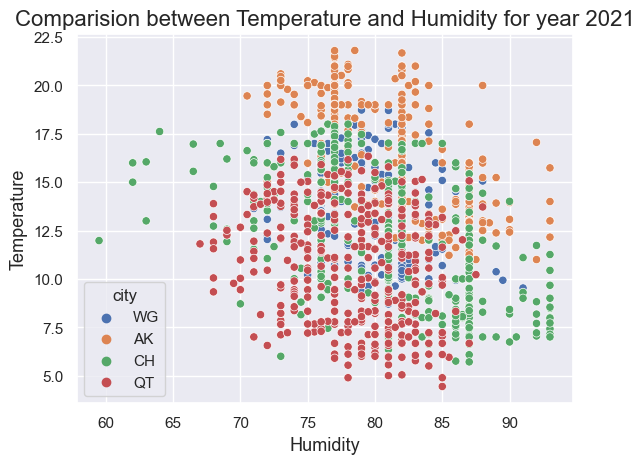

In [246]:
#Comparision between Temperature and Humidity
x = nz_data['humidity_median']
y = nz_data['temp_median']

c =nz_data['city']
plt.figure()
sns.scatterplot(x, y, hue= c)

#plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('Comparision between Temperature and Humidity for year 2021', fontsize=16)
plt.xlabel('Humidity', fontsize=13)
plt.ylabel('Temperature', fontsize=13)


plt.show()
plt.close() 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


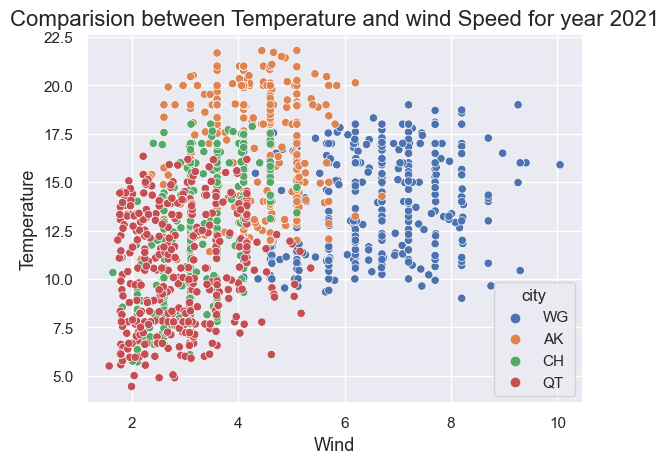

In [247]:
#Comparision between Temperature and wind Speed
x = nz_data['wind_median']
y = nz_data['temp_median']
c =nz_data['city']
plt.figure()
sns.scatterplot(x, y, hue= c)

#plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('Comparision between Temperature and wind Speed for year 2021', fontsize=16)
plt.xlabel('Wind', fontsize=13)
plt.ylabel('Temperature', fontsize=13)

plt.show()
plt.close()

In [194]:
new_nz_data = nz_data[["month", "day", "city", "temp_av_min", "temp_av_max", "temp_median", "pressure_min", "pressure_max", "pressure_median", 
                  "humidity_min", "humidity_max", "humidity_median", "wind_min", "wind_max", "wind_median", 
                  "prep_min", "prep_max", "prep_median", "clouds_min", "clouds_max", "clouds_median"]]

In [195]:
new_nz_data.head()

,month,day,city,temp_av_min,temp_av_max,temp_median,pressure_min,pressure_max,pressure_median,humidity_min,...,humidity_median,wind_min,wind_max,wind_median,prep_min,prep_max,prep_median,clouds_min,clouds_max,clouds_median
0,1,1,WG,15.67,21.44,17.95,1001,1029,1012.0,32,...,78.5,0.00,17.00,6.70,0,3.0,0.0,0,100,20.0
1,1,2,WG,16.49,21.27,18.00,993,1034,1012.0,34,...,81.5,0.41,15.40,6.70,0,3.0,0.0,0,100,68.0
2,1,3,WG,15.12,20.78,16.87,994,1034,1009.0,45,...,82.0,0.45,18.39,6.20,0,3.0,0.0,0,100,44.0
3,1,4,WG,13.69,20.33,17.00,988,1031,1011.0,40,...,77.0,0.45,13.90,5.70,0,3.0,0.0,0,100,20.0
4,1,5,WG,14.35,20.17,16.96,988,1027,1012.0,34,...,77.0,0.45,15.90,6.67,0,3.0,0.0,0,100,0.5


In [199]:
median_nz_data = nz_data[["city", "temp_median", "pressure_median", 
                  "humidity_median", "wind_median", 
                  "prep_median", "clouds_median"]]

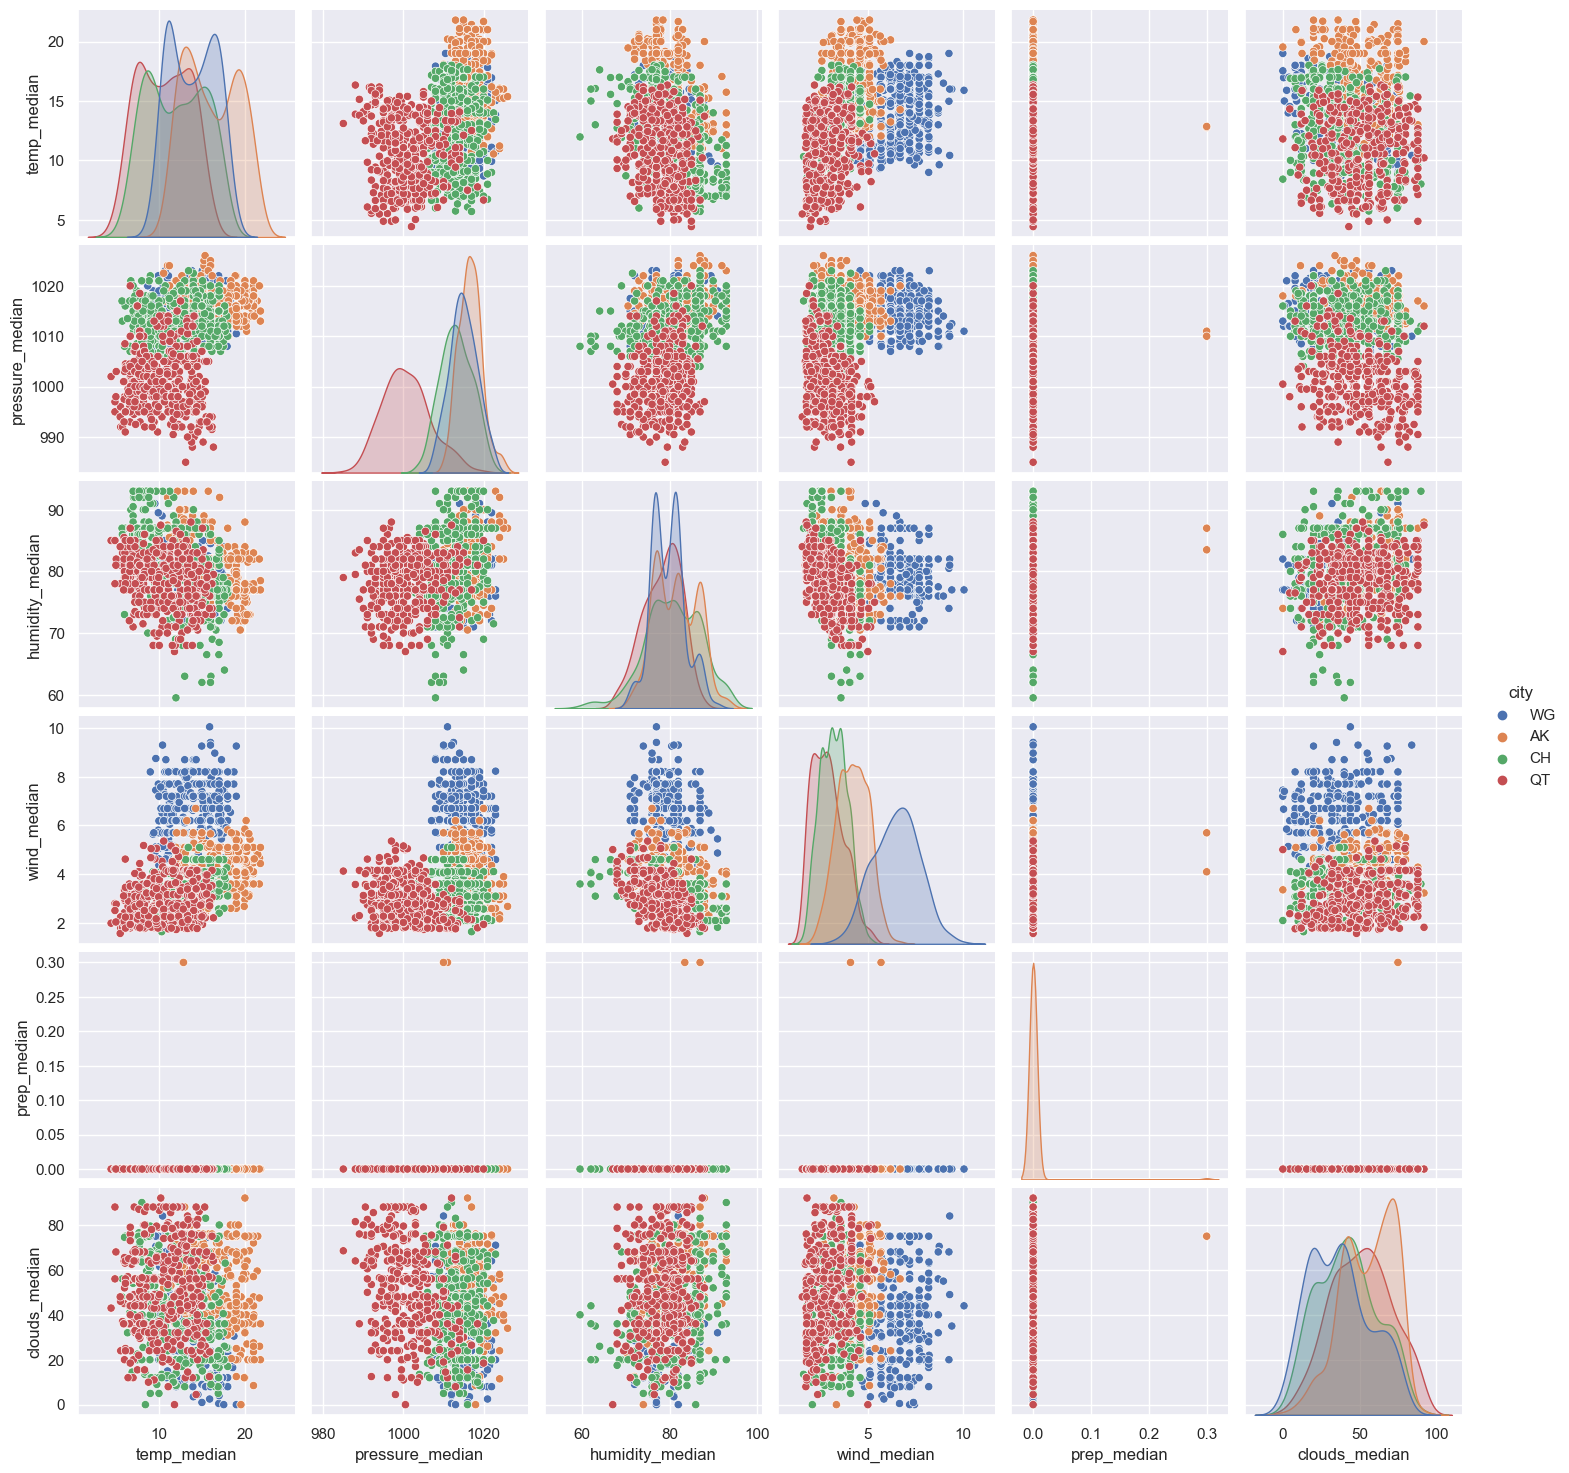

In [205]:
#Overall Weather comparision between 4 chosen cities
sns.pairplot(median_nz_data, hue = "city")


# Monthly max temperature  and humidity comparision graph 

<AxesSubplot:xlabel='month', ylabel='temp_av_max'>

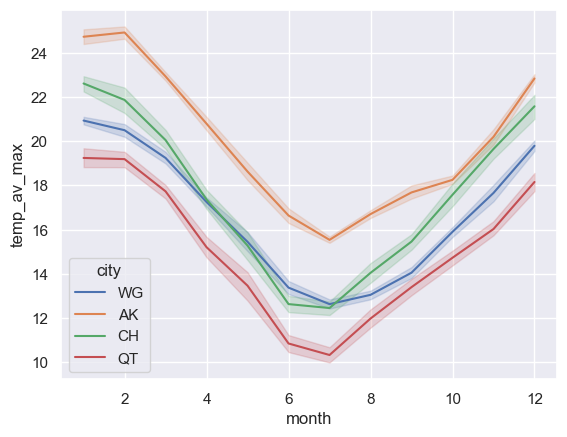

In [380]:
sns.lineplot(x = nz_data["month"], y = nz_data["temp_av_max"], hue = nz_data["city"])

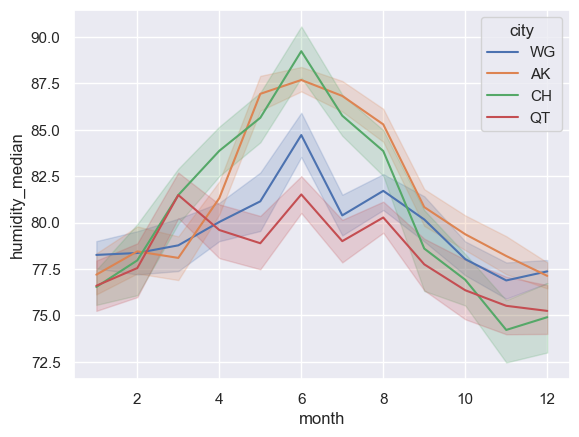

In [412]:
sns.lineplot(x = nz_data["month"], y = nz_data["humidity_median"], hue = nz_data["city"]);

# Minimum temperatures

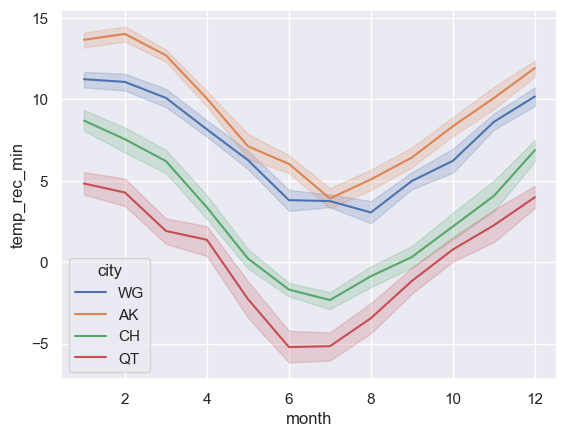

In [384]:
sns.lineplot(x = nz_data["month"], y = nz_data["temp_rec_min"], hue = nz_data["city"]);

# Conclusion

As per my analysis from the data of 4 selected cities in NZ for year 2021 

Wellington  = Extreme Windy conditions

Queenstown  = lower temperature levels  

Christchurch = moderate weather

Auckland = high humididty